In [1]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

pd.set_option('display.max_columns', None)


In [2]:
users = pd.read_csv('telecom_users.csv')
users.shape

(5986, 22)

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
users.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
# Find Missing Values
(users['TotalCharges'].values == ' ').sum()

10

In [6]:
#Print rows having missing values in total charges
users.loc[users['TotalCharges'].values == ' ']

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [7]:
# Delete unnecessary columns
users = users.drop(['Unnamed: 0', 'customerID', 'TotalCharges'], axis = 1)

In [8]:
users.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [10]:
#Count of churned and non churned users
churn = users.groupby('Churn').agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
churn

,Churn,count
0,No,4399
1,Yes,1587


In [11]:
cat_cols = users.select_dtypes(include = ['object']).columns.to_list()
for col in cat_cols:
    print(col)
    print(users.groupby([col, 'Churn']).size())

gender
gender  Churn
Female  No       2145
        Yes       791
Male    No       2254
        Yes       796
dtype: int64
Partner
Partner  Churn
No       No       2071
         Yes      1011
Yes      No       2328
         Yes       576
dtype: int64
Dependents
Dependents  Churn
No          No       2889
            Yes      1306
Yes         No       1510
            Yes       281
dtype: int64
PhoneService
PhoneService  Churn
No            No        441
              Yes       149
Yes           No       3958
              Yes      1438
dtype: int64
MultipleLines
MultipleLines     Churn
No                No       2133
                  Yes       715
No phone service  No        441
                  Yes       149
Yes               No       1825
                  Yes       723
dtype: int64
InternetService
InternetService  Churn
DSL              No       1671
                 Yes       397
Fiber optic      No       1536
                 Yes      1091
No               No       1192
         

In [12]:
fig = px.pie(churn, values = churn['count'], names = churn['Churn'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.85, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer churn', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

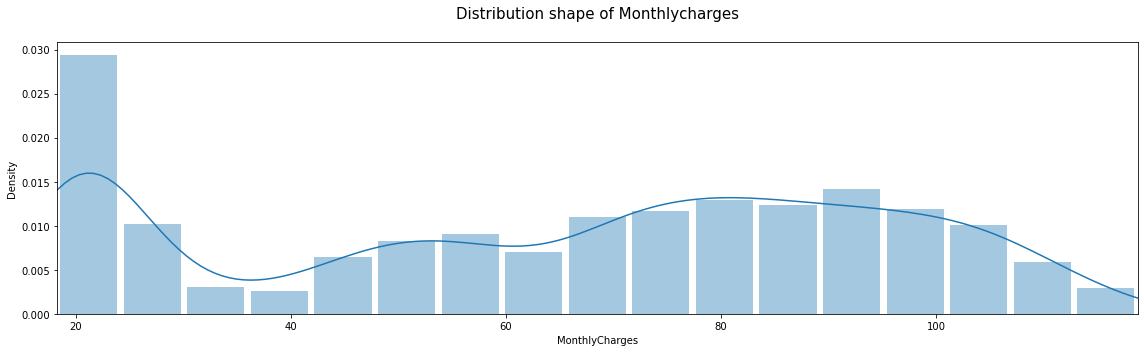

In [13]:
#Distribution and skewness of Monthly Charges

plt.figure(figsize=(16,5))
sns.distplot(users['MonthlyCharges'], hist_kws={"rwidth": 0.9})
plt.xlim(users['MonthlyCharges'].min(), users['MonthlyCharges'].max())
plt.title(f"Distribution shape of {'MonthlyCharges'.capitalize()}\n", fontsize=15)
plt.tight_layout()
plt.show()

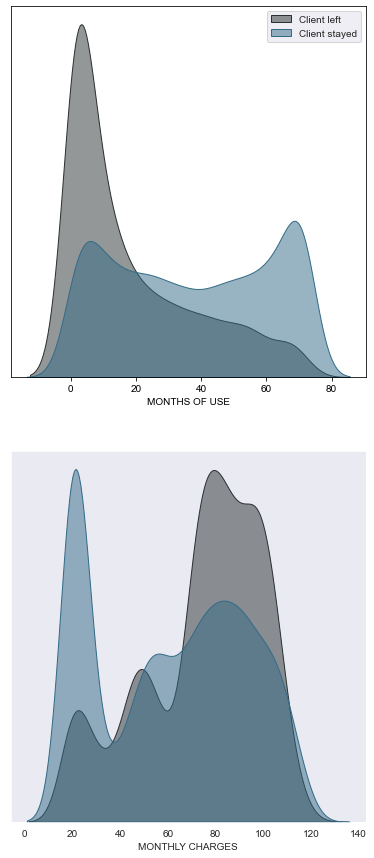

In [14]:
fig = plt.figure(figsize = (14, 15))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(users.query('Churn == "Yes"')['tenure'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(users.query('Churn == "No"')['tenure'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHS OF USE')
plt.yticks([])
plt.legend()



plt.subplot(223)
sns.set_style("dark")
sns.kdeplot(users.query('Churn == "Yes"')['MonthlyCharges'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(users.query('Churn == "No"')['MonthlyCharges'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHLY CHARGES')
plt.yticks([])


plt.show()

In [15]:
#Affect of having a spouse and retirement on customer churn
spouse = users.groupby(['Partner', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
spouse.iloc[[0,1], 0] = 'Not married'
spouse.iloc[[2,3], 0] = 'Married'
spouse

,Partner,Churn,count
0,Not married,No,2071
1,Not married,Yes,1011
2,Married,No,2328
3,Married,Yes,576


In [16]:
SeniorCitizen = users.groupby(['SeniorCitizen', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
SeniorCitizen.iloc[[0,1], 0] = 'Not pensioner'
SeniorCitizen.iloc[[2,3], 0] = 'Pensioner'
SeniorCitizen

,SeniorCitizen,Churn,count
0,Not pensioner,No,3835
1,Not pensioner,Yes,1185
2,Pensioner,No,564
3,Pensioner,Yes,402


In [17]:
X = users.drop('Churn', axis = 1)
rey = {'No': 0, 'Yes': 1}
users['Churn'] = users['Churn'].map(rey)
y = users['Churn']

num_cols = ['tenure', 'MonthlyCharges']
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

In [18]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45


In [19]:
def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

In [20]:
users = label_encoder(users)
users.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,0


In [21]:
corrMatrix = users.corr().abs()['Churn'].sort_values(ascending=False)
corrMatrix

Churn               1.000000
Contract            0.396446
tenure              0.348469
OnlineSecurity      0.290306
TechSupport         0.277261
OnlineBackup        0.193851
PaperlessBilling    0.188996
MonthlyCharges      0.186753
DeviceProtection    0.180120
Dependents          0.160204
SeniorCitizen       0.150097
Partner             0.146840
PaymentMethod       0.103927
InternetService     0.047198
StreamingMovies     0.039100
StreamingTV         0.037609
MultipleLines       0.034943
gender              0.009548
PhoneService        0.009421
Name: Churn, dtype: float64

In [22]:
# Remove the attribures having less correlation with Churn
users.drop(['PhoneService', 'gender'],inplace=True,axis=1)

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5986 non-null   int64  
 1   Partner           5986 non-null   int32  
 2   Dependents        5986 non-null   int32  
 3   tenure            5986 non-null   int64  
 4   MultipleLines     5986 non-null   int32  
 5   InternetService   5986 non-null   int32  
 6   OnlineSecurity    5986 non-null   int32  
 7   OnlineBackup      5986 non-null   int32  
 8   DeviceProtection  5986 non-null   int32  
 9   TechSupport       5986 non-null   int32  
 10  StreamingTV       5986 non-null   int32  
 11  StreamingMovies   5986 non-null   int32  
 12  Contract          5986 non-null   int32  
 13  PaperlessBilling  5986 non-null   int32  
 14  PaymentMethod     5986 non-null   int32  
 15  MonthlyCharges    5986 non-null   float64
 16  Churn             5986 non-null   int64  


In [24]:
#Standardisation
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1,0,1,1,1.612576,1,2,2,1,1,1,1,1,1,2,0,1,-1.351686
1,0,0,0,0,0.470387,1,0,1,0,2,2,0,2,0,0,1,1,0.775360
2,0,1,1,0,0.225633,1,2,1,0,0,0,0,0,0,0,1,0,0.336999
3,1,0,0,0,-1.161310,1,0,0,0,0,0,0,0,2,0,1,2,-0.295635
4,1,0,0,0,-1.242895,1,0,0,2,0,2,0,0,0,0,0,2,-0.376997


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [75]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_OverSampled, y_train_OverSampled = oversample.fit_resample(X_train, y_train)

In [76]:
y_train_OverSampled.value_counts()

1    3536
0    3536
Name: Churn, dtype: int64

In [77]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train_UnderSampled, y_train_UnderSampled = undersample.fit_resample(X_train, y_train)

In [105]:
def FeatureImportance(model, X_train):
    f_imp = pd.DataFrame(columns = ['feature', 'importance'], index = range(18))
    for i in range(len(f_imp.index)):
        f_imp.iloc[i, 0] = X_train.columns.to_list()[i]
    
    f_imp['importance'] = model.feature_importances_
    f_imp = f_imp.sort_values('importance', ascending = False)
    print(f_imp)

## Models with Default Hyperparameter Values

In [117]:
def Evaluate_Model(model_name,model_clf,data_type,X_train,y_train,X_test,y_test):
    print('Model ',model_name)
    print('Data ', data_type)
    start = time.time()
    model = model_clf.fit(X_train,y_train)
    end = time.time()
    training_time = end-start
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    
    AUC_test = round(roc_auc_score(y_test, y_prob), 3)
    Recall_test = round(recall_score(y_test, y_pred), 2)
    Precision_test = round(precision_score(y_test, y_pred),2)
    f1_Score_test = round(f1_score(y_test, y_pred),2)
    
    print(f'ROC AUC Test set score: {AUC_test}')
    print(f'Recall Test set score: {Recall_test}')
    print(f'Precision Test set score: {Precision_test}')
    print(f'f1 Score Test set : {f1_Score_test}')
    print('')
    print('-----------------------------------------------------')
    print('')
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    print('Cross-validation scores with 5 folds:')
    print('')
    
    AUC_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'roc_auc').mean(), 3)
    Recall_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall').mean(), 2)
    Precision_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision').mean(), 2)
    f1_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'f1').mean(), 2)
    
    print(f"ROC AUC: {AUC_CV}")
    print(f"Recall: {Recall_CV}")
    print(f"Precision: {Precision_CV}")
    print(f"f1: {f1_CV}")

    # Visualize confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
                yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
    plt.yticks(rotation = 0)
    plt.show()
    
    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style = 'white')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('')
    print('-----------------------------------------------------')
    print('')
    
    return [model_name,data_type,training_time,AUC_test,Recall_test,Precision_test,f1_Score_test,AUC_CV,Recall_CV,Precision_CV,f1_CV]
    

In [118]:
models = {
    "Logistic Regression": LogisticRegression(random_state=10),
    "Random Forest": RandomForestClassifier(random_state = 22),
    "LGBM" : LGBMClassifier(random_state = 22),
    "XGB" : XGBClassifier(random_state = 22,objective = 'binary:logistic', eval_metric = 'logloss')
}

data = {
    "Imbalanced data" : [X_train , y_train],
    "Over_Sampled_data" : [X_train_OverSampled , y_train_OverSampled],
    "Under_Sampled_data" : [X_train_UnderSampled , y_train_UnderSampled]
}

Model  Logistic Regression
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       863
           1       0.63      0.59      0.61       335

    accuracy                           0.79      1198
   macro avg       0.74      0.73      0.73      1198
weighted avg       0.78      0.79      0.79      1198

ROC AUC Test set score: 0.849
Recall Test set score: 0.59
Precision Test set score: 0.63
f1 Score Test set : 0.61

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.836
Recall: 0.51
Precision: 0.65
f1: 0.57


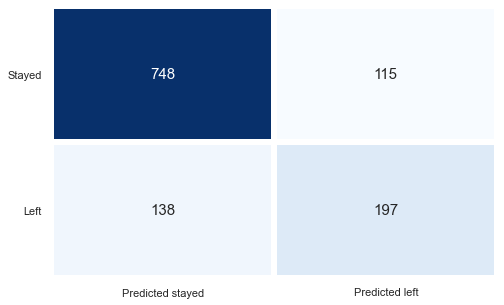

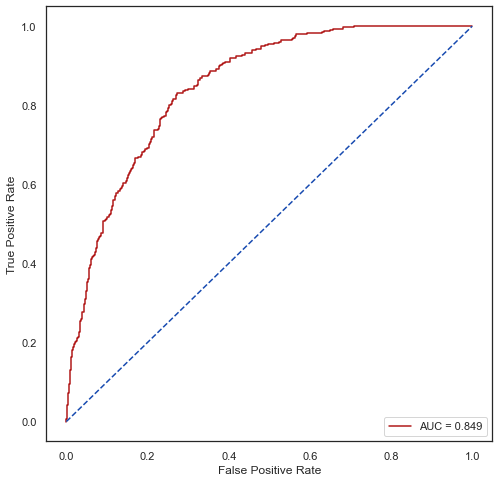


-----------------------------------------------------

Model  Logistic Regression
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       863
           1       0.52      0.81      0.63       335

    accuracy                           0.74      1198
   macro avg       0.71      0.76      0.72      1198
weighted avg       0.80      0.74      0.75      1198

ROC AUC Test set score: 0.834
Recall Test set score: 0.81
Precision Test set score: 0.52
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.859
Recall: 0.81
Precision: 0.76
f1: 0.79


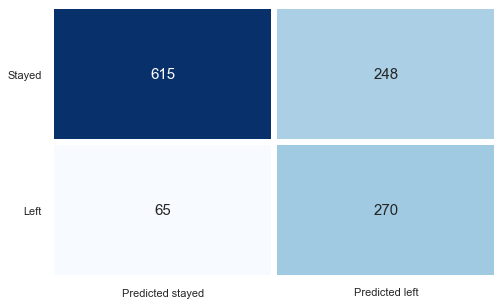

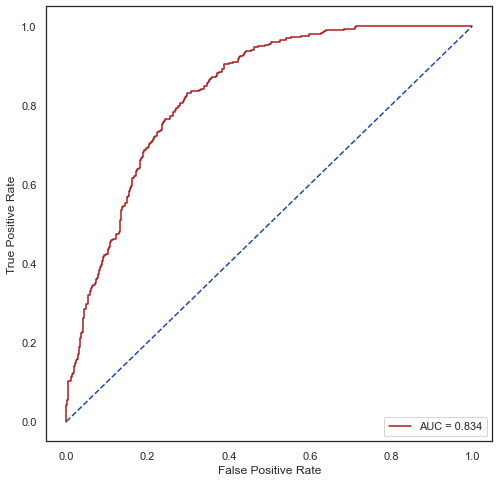


-----------------------------------------------------

Model  Logistic Regression
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       863
           1       0.47      0.84      0.60       335

    accuracy                           0.69      1198
   macro avg       0.69      0.74      0.68      1198
weighted avg       0.79      0.69      0.71      1198

ROC AUC Test set score: 0.803
Recall Test set score: 0.84
Precision Test set score: 0.47
f1 Score Test set : 0.6

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.745
Recall: 0.78
Precision: 0.64
f1: 0.7


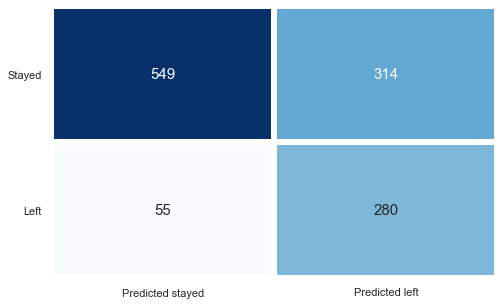

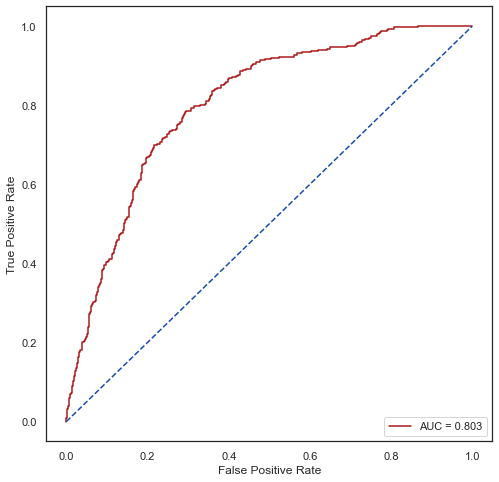


-----------------------------------------------------

Model  Random Forest
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       863
           1       0.62      0.54      0.58       335

    accuracy                           0.78      1198
   macro avg       0.72      0.71      0.71      1198
weighted avg       0.77      0.78      0.77      1198

ROC AUC Test set score: 0.819
Recall Test set score: 0.54
Precision Test set score: 0.62
f1 Score Test set : 0.58

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.815
Recall: 0.47
Precision: 0.62
f1: 0.53


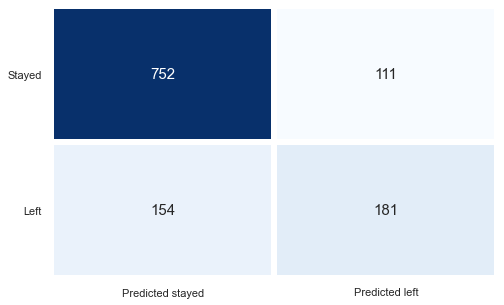

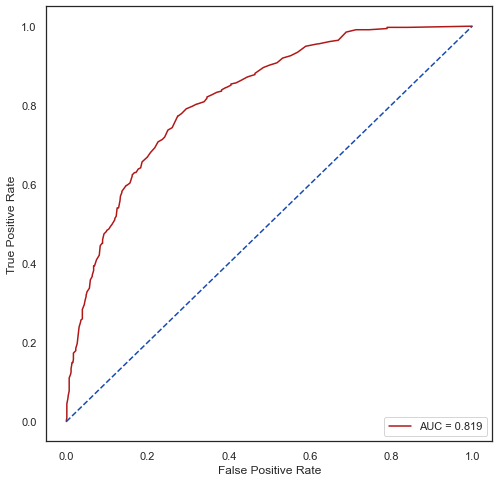


-----------------------------------------------------

Model  Random Forest
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       863
           1       0.54      0.66      0.60       335

    accuracy                           0.75      1198
   macro avg       0.70      0.72      0.71      1198
weighted avg       0.77      0.75      0.76      1198

ROC AUC Test set score: 0.811
Recall Test set score: 0.66
Precision Test set score: 0.54
f1 Score Test set : 0.6

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.915
Recall: 0.87
Precision: 0.82
f1: 0.84


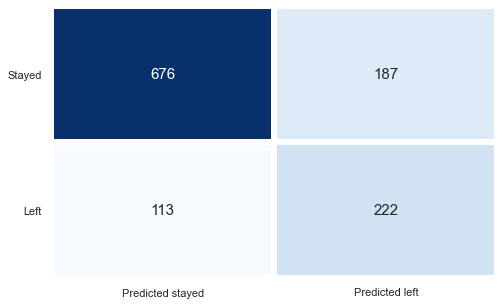

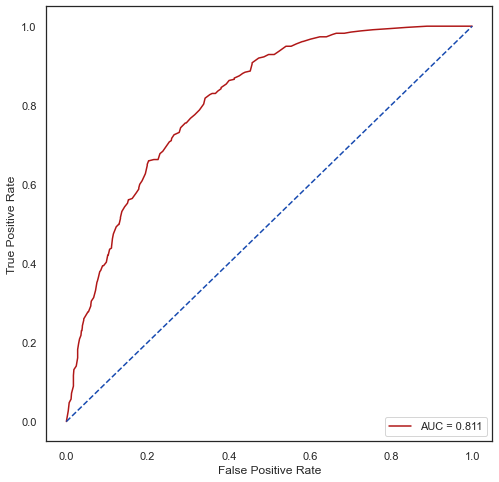


-----------------------------------------------------

Model  Random Forest
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       863
           1       0.35      0.80      0.49       335

    accuracy                           0.53      1198
   macro avg       0.60      0.61      0.53      1198
weighted avg       0.71      0.53      0.55      1198

ROC AUC Test set score: 0.647
Recall Test set score: 0.8
Precision Test set score: 0.35
f1 Score Test set : 0.49

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.736
Recall: 0.7
Precision: 0.66
f1: 0.68


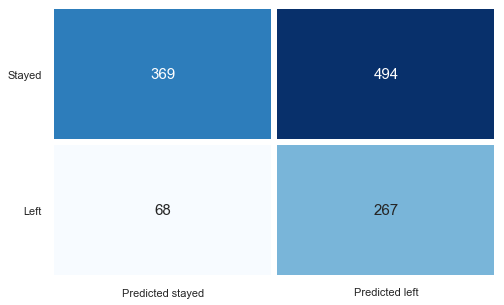

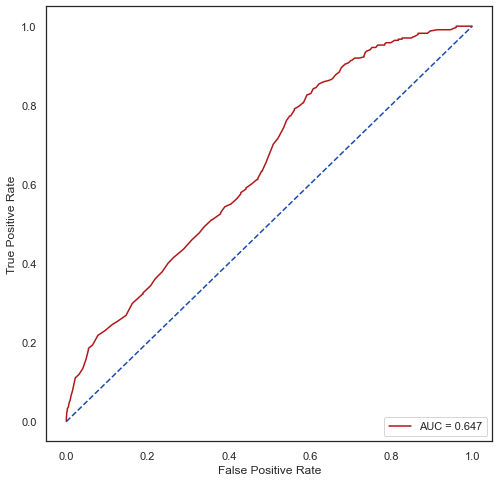


-----------------------------------------------------

Model  LGBM
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       863
           1       0.62      0.58      0.60       335

    accuracy                           0.78      1198
   macro avg       0.73      0.72      0.73      1198
weighted avg       0.78      0.78      0.78      1198

ROC AUC Test set score: 0.839
Recall Test set score: 0.58
Precision Test set score: 0.62
f1 Score Test set : 0.6

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.828
Recall: 0.51
Precision: 0.62
f1: 0.56


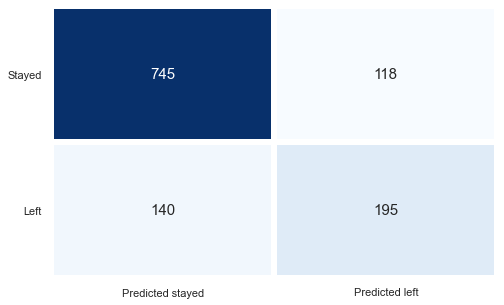

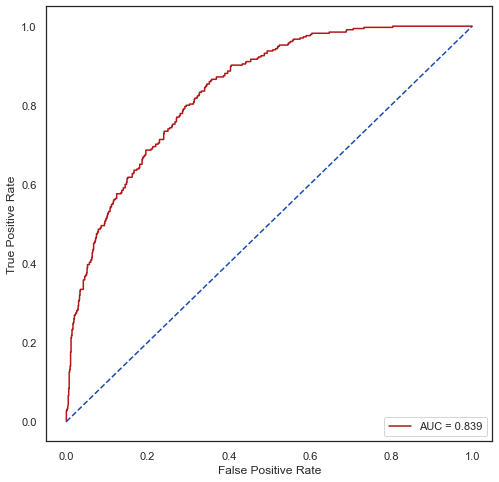


-----------------------------------------------------

Model  LGBM
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       863
           1       0.54      0.74      0.63       335

    accuracy                           0.75      1198
   macro avg       0.71      0.75      0.72      1198
weighted avg       0.79      0.75      0.76      1198

ROC AUC Test set score: 0.832
Recall Test set score: 0.74
Precision Test set score: 0.54
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.907
Recall: 0.86
Precision: 0.8
f1: 0.83


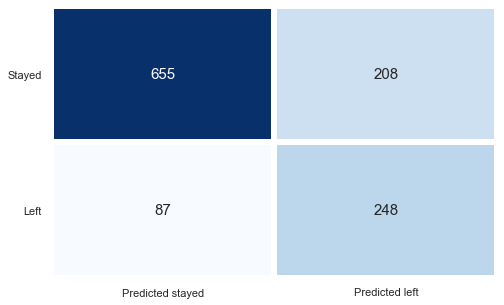

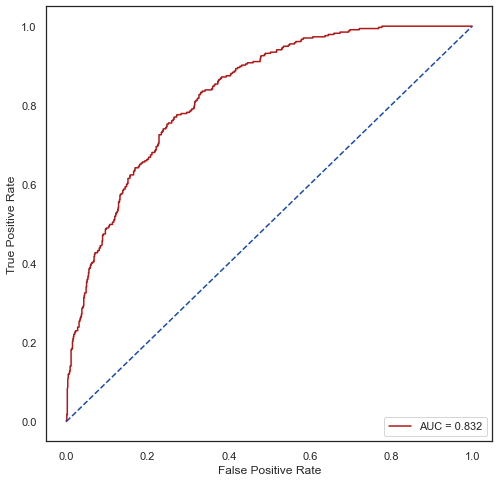


-----------------------------------------------------

Model  LGBM
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       863
           1       0.35      0.79      0.48       335

    accuracy                           0.53      1198
   macro avg       0.60      0.61      0.53      1198
weighted avg       0.70      0.53      0.54      1198

ROC AUC Test set score: 0.611
Recall Test set score: 0.79
Precision Test set score: 0.35
f1 Score Test set : 0.48

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.754
Recall: 0.7
Precision: 0.67
f1: 0.69


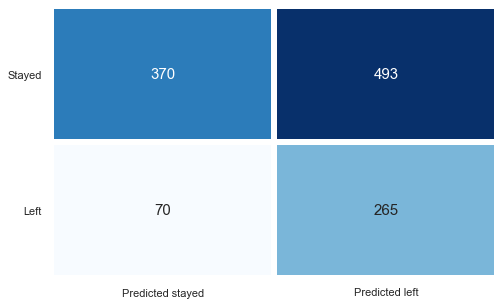

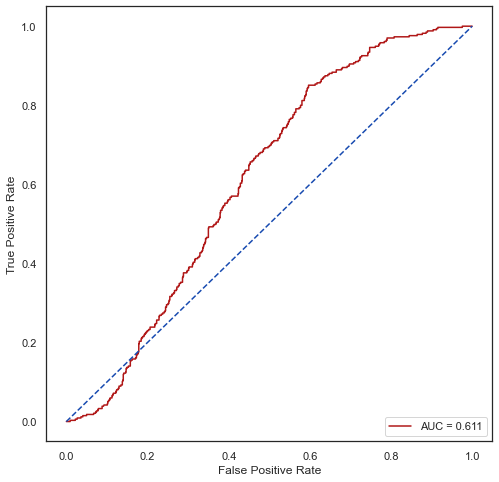


-----------------------------------------------------

Model  XGB
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       863
           1       0.60      0.57      0.58       335

    accuracy                           0.77      1198
   macro avg       0.72      0.71      0.71      1198
weighted avg       0.77      0.77      0.77      1198

ROC AUC Test set score: 0.823
Recall Test set score: 0.57
Precision Test set score: 0.6
f1 Score Test set : 0.58

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.81
Recall: 0.5
Precision: 0.59
f1: 0.54


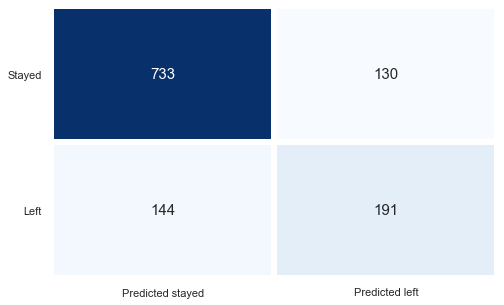

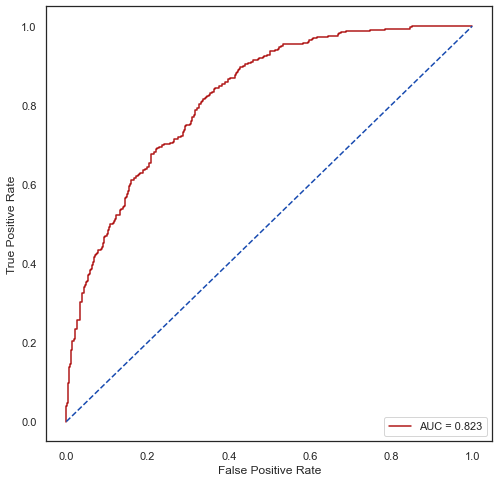


-----------------------------------------------------

Model  XGB
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       863
           1       0.55      0.68      0.61       335

    accuracy                           0.76      1198
   macro avg       0.71      0.73      0.72      1198
weighted avg       0.78      0.76      0.76      1198

ROC AUC Test set score: 0.815
Recall Test set score: 0.68
Precision Test set score: 0.55
f1 Score Test set : 0.61

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.913
Recall: 0.85
Precision: 0.81
f1: 0.83


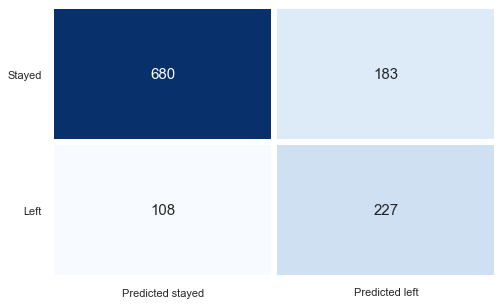

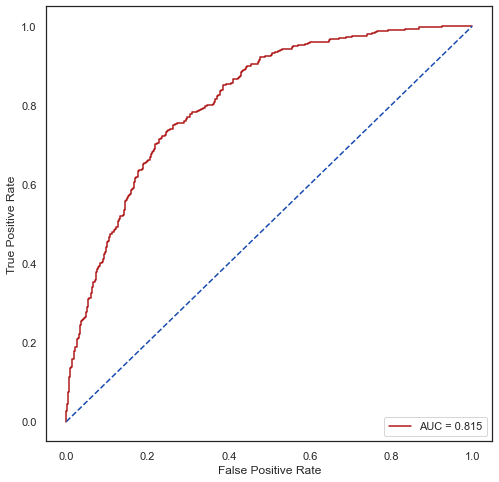


-----------------------------------------------------

Model  XGB
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       863
           1       0.35      0.79      0.48       335

    accuracy                           0.53      1198
   macro avg       0.59      0.61      0.52      1198
weighted avg       0.70      0.53      0.54      1198

ROC AUC Test set score: 0.581
Recall Test set score: 0.79
Precision Test set score: 0.35
f1 Score Test set : 0.48

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.742
Recall: 0.69
Precision: 0.66
f1: 0.68


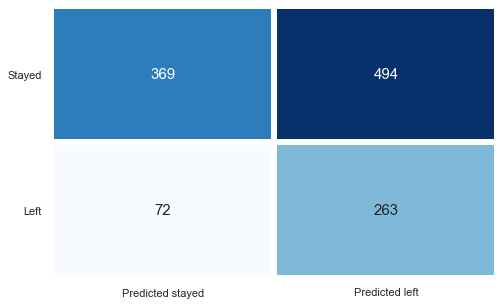

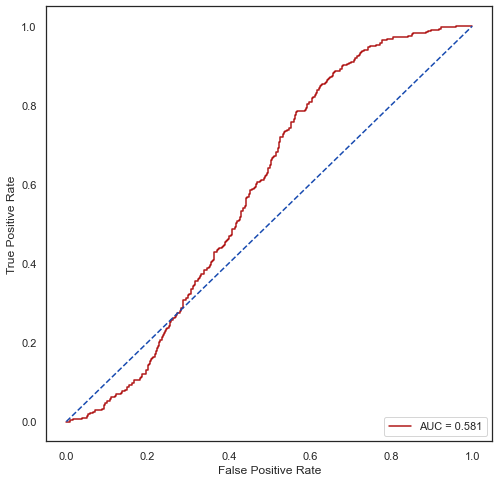


-----------------------------------------------------



In [119]:
result = []
for model_name, model_clf in models.items():
    for data_type, training_data in data.items():
        result.append(Evaluate_Model(model_name,model_clf,data_type,training_data[0],training_data[1],X_test,y_test))

In [120]:
Output = pd.DataFrame(result, columns = ['Model', 'Data', 'Training Time','AUC Test', 'Recall Test', 'Precision Test', 'f1 Score test', 'AUC CV Train','Recall CV Train','Precision CV Train', 'f1 CV Train'])
Output

,Model,Data,Training Time,AUC Test,Recall Test,Precision Test,f1 Score test,AUC CV Train,Recall CV Train,Precision CV Train,f1 CV Train
0,Logistic Regression,Imbalanced data,0.262823,0.849,0.59,0.63,0.61,0.836,0.51,0.65,0.57
1,Logistic Regression,Over_Sampled_data,0.068810,0.834,0.81,0.52,0.63,0.859,0.81,0.76,0.79
2,Logistic Regression,Under_Sampled_data,0.047765,0.803,0.84,0.47,0.60,0.745,0.78,0.64,0.70
3,Random Forest,Imbalanced data,1.175076,0.819,0.54,0.62,0.58,0.815,0.47,0.62,0.53
4,Random Forest,Over_Sampled_data,1.751079,0.811,0.66,0.54,0.60,0.915,0.87,0.82,0.84
5,Random Forest,Under_Sampled_data,0.785859,0.647,0.80,0.35,0.49,0.736,0.70,0.66,0.68
6,LGBM,Imbalanced data,0.196901,0.839,0.58,0.62,0.60,0.828,0.51,0.62,0.56
7,LGBM,Over_Sampled_data,0.204250,0.832,0.74,0.54,0.63,0.907,0.86,0.80,0.83
8,LGBM,Under_Sampled_data,0.157560,0.611,0.79,0.35,0.48,0.754,0.70,0.67,0.69
9,XGB,Imbalanced data,0.606914,0.823,0.57,0.60,0.58,0.810,0.50,0.59,0.54


## Hyperparameter Tuning

### 1. Logistic Regression

In [78]:
model = LogisticRegression(random_state = 10)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [100, 10, 1.0, 0.1, 0.01]
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best Score: 0.8132860578215639
Best Hyperparameters: {'solver': 'newton-cg', 'C': 0.1}
0.811678 (0.015840) with: {'solver': 'newton-cg', 'C': 100}
0.811678 (0.015840) with: {'solver': 'lbfgs', 'C': 100}
0.811678 (0.015840) with: {'solver': 'liblinear', 'C': 100}
0.811678 (0.015840) with: {'solver': 'newton-cg', 'C': 10}
0.811678 (0.015840) with: {'solver': 'lbfgs', 'C': 10}
0.811679 (0.016123) with: {'solver': 'liblinear', 'C': 10}
0.812533 (0.016268) with: {'solver': 'newton-cg', 'C': 1.0}
0.812395 (0.016382) with: {'solver': 'lbfgs', 'C': 1.0}
0.812551 (0.016117) with: {'solver': 'liblinear', 'C': 1.0}
0.813286 (0.017114) with: {'solver': 'newton-cg', 'C': 0.1}
0.813009 (0.017089) with: {'solver': 'lbfgs', 'C': 0.1}
0.809055 (0.017375) with: {'solver': 'liblinear', 'C': 0.1}
0.808446 (0.016295) with: {'solver': 'newton-cg', 'C': 0.01}
0.808446 (0.016295) with: {'solver': 'lbfgs', 'C': 0.01}
0.797115 (0.017292) with: {'solver': 'liblinear', 'C': 0.01}


### 2. Random Forest

In [79]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [5,8,12]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881645 using {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 1000}
0.816323 (0.014200) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
0.826921 (0.017005) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.826497 (0.018434) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
0.830318 (0.024869) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
0.820277 (0.019423) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
0.825366 (0.019451) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 1000}
0.852237 (0.012361) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}
0.857751 (0.012593) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
0.859305 (0.013394) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 1000}
0.858596 (0.008188) with: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 10}
0.858174 (0.013200) with: {'max_dept

### 3. Light GBM (LGBM)

In [98]:
# define models and parameters
model = LGBMClassifier(random_state = 7)
num_leaves = [2,3,5]
max_depth = [2,3,5]
# define grid search
grid = dict(num_leaves=num_leaves,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846298 using {'max_depth': 3, 'num_leaves': 5}
0.843045 (0.011410) with: {'max_depth': 2, 'num_leaves': 2}
0.831733 (0.012604) with: {'max_depth': 2, 'num_leaves': 3}
0.844177 (0.012088) with: {'max_depth': 2, 'num_leaves': 5}
0.843045 (0.011410) with: {'max_depth': 3, 'num_leaves': 2}
0.831733 (0.012604) with: {'max_depth': 3, 'num_leaves': 3}
0.846298 (0.010448) with: {'max_depth': 3, 'num_leaves': 5}
0.843045 (0.011410) with: {'max_depth': 5, 'num_leaves': 2}
0.831733 (0.012604) with: {'max_depth': 5, 'num_leaves': 3}
0.844318 (0.011192) with: {'max_depth': 5, 'num_leaves': 5}


### 4.XGB Classifier

In [99]:

# define models and parameters
model = XGBClassifier(random_state=7, objective = 'binary:logistic', eval_metric = 'logloss' )
max_depth = [2,3,5]
min_child_weight = [1,3]
# define grid search
grid = dict(max_depth=max_depth, min_child_weight= min_child_weight)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.854358 using {'max_depth': 5, 'min_child_weight': 3}
0.848984 (0.010216) with: {'max_depth': 2, 'min_child_weight': 1}
0.846579 (0.009600) with: {'max_depth': 2, 'min_child_weight': 3}
0.849123 (0.010593) with: {'max_depth': 3, 'min_child_weight': 1}
0.850821 (0.012762) with: {'max_depth': 3, 'min_child_weight': 3}
0.854357 (0.015215) with: {'max_depth': 5, 'min_child_weight': 1}
0.854358 (0.016745) with: {'max_depth': 5, 'min_child_weight': 3}


In [121]:
# Models with tuned hyperparameters
Tuned_models = {
    "Logistic Regression": LogisticRegression(random_state = 10, solver='newton-cg', C = 0.1),
    "Random Forest": RandomForestClassifier(random_state = 22, n_estimators = 1000, max_features='log2', max_depth = 12),
    "LGBM" : LGBMClassifier(random_state = 7, max_depth = 3, num_leaves = 5),
    "XGB" : XGBClassifier(random_state = 7, max_depth = 5,min_child_weight=3, objective = 'binary:logistic', eval_metric = 'logloss')
}



Model  Logistic Regression
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       863
           1       0.52      0.81      0.63       335

    accuracy                           0.74      1198
   macro avg       0.71      0.76      0.72      1198
weighted avg       0.80      0.74      0.75      1198

ROC AUC Test set score: 0.834
Recall Test set score: 0.81
Precision Test set score: 0.52
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.859
Recall: 0.81
Precision: 0.76
f1: 0.79


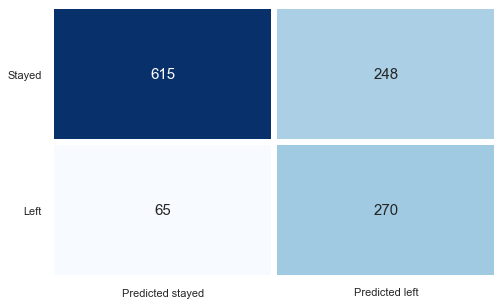

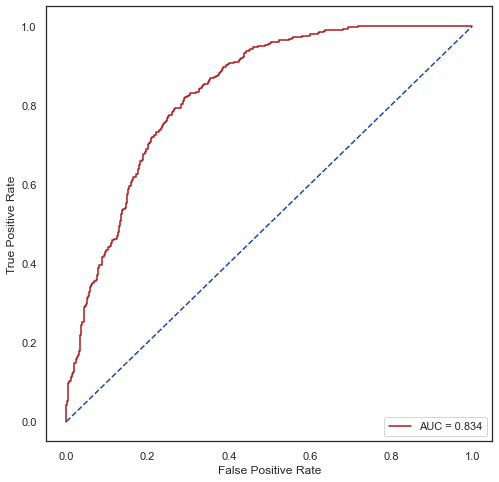


-----------------------------------------------------

Model  Random Forest
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       863
           1       0.54      0.73      0.62       335

    accuracy                           0.75      1198
   macro avg       0.71      0.74      0.72      1198
weighted avg       0.78      0.75      0.76      1198

ROC AUC Test set score: 0.829
Recall Test set score: 0.73
Precision Test set score: 0.54
f1 Score Test set : 0.62

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.911
Recall: 0.88
Precision: 0.81
f1: 0.84


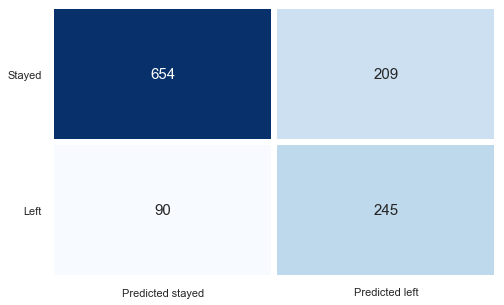

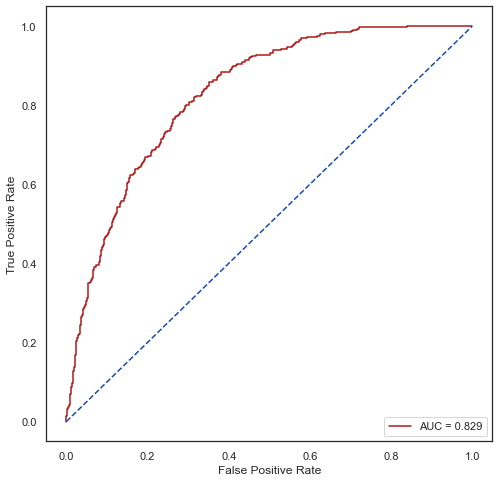


-----------------------------------------------------

Model  LGBM
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       863
           1       0.53      0.81      0.64       335

    accuracy                           0.74      1198
   macro avg       0.72      0.76      0.72      1198
weighted avg       0.80      0.74      0.76      1198

ROC AUC Test set score: 0.842
Recall Test set score: 0.81
Precision Test set score: 0.53
f1 Score Test set : 0.64

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.879
Recall: 0.85
Precision: 0.77
f1: 0.81


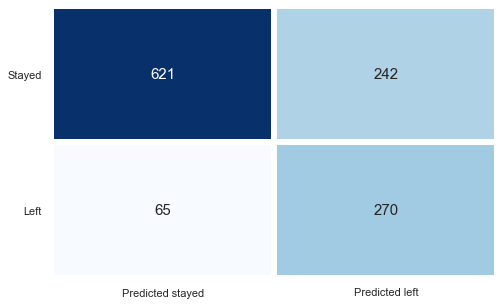

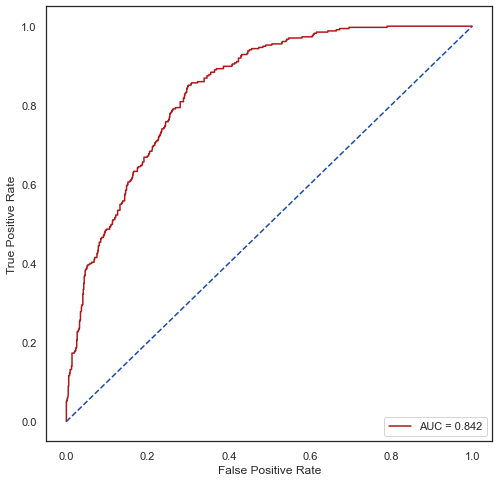


-----------------------------------------------------

Model  XGB
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       863
           1       0.55      0.70      0.61       335

    accuracy                           0.75      1198
   macro avg       0.71      0.74      0.72      1198
weighted avg       0.78      0.75      0.76      1198

ROC AUC Test set score: 0.828
Recall Test set score: 0.7
Precision Test set score: 0.55
f1 Score Test set : 0.61

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.909
Recall: 0.86
Precision: 0.81
f1: 0.83


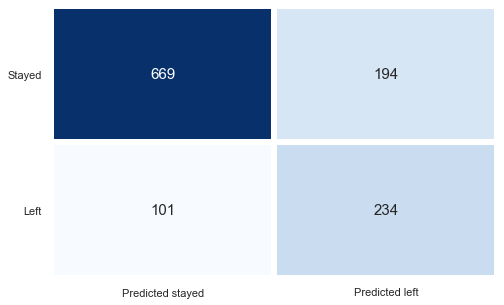

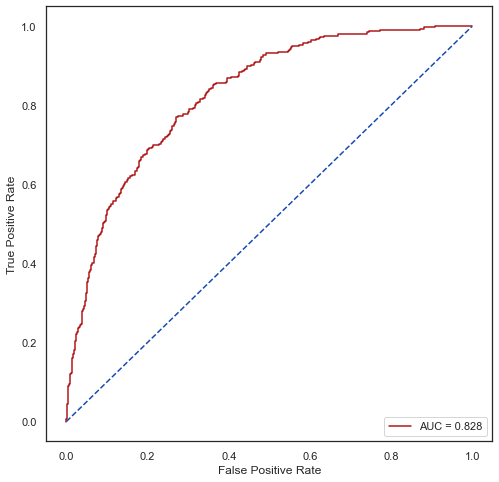


-----------------------------------------------------



In [122]:
Tuned_result = []
for model_name, model_clf in Tuned_models.items():
    Tuned_result.append(Evaluate_Model(model_name,model_clf,"Oversampled Data",X_train_OverSampled,y_train_OverSampled,X_test,y_test))

## Hyperparameter Tuned Models Output

In [102]:
Tuned_Output = pd.DataFrame(Tuned_result, columns = ['Model', 'Data','Training Time', 'AUC Test', 'Recall Test', 'Precision Test', 'f1 Score test', 'AUC CV Train','Recall CV Train','Precision CV Train', 'f1 CV Train'])
Tuned_Output

,Model,Data,Training Time,AUC Test,Recall Test,Precision Test,f1 Score test,AUC CV Train,Recall CV Train,Precision CV Train,f1 CV Train
0,Logistic Regression,Oversampled Data,0.050864,0.834,0.81,0.52,0.63,0.859,0.81,0.76,0.79
1,Random Forest,Oversampled Data,4.973756,0.829,0.73,0.54,0.62,0.911,0.88,0.81,0.84
2,LGBM,Oversampled Data,0.059322,0.842,0.81,0.53,0.64,0.879,0.85,0.77,0.81
3,XGB,Oversampled Data,0.398728,0.828,0.70,0.55,0.61,0.909,0.86,0.81,0.83


### Feature Importance of Best Model LGBM

In [116]:
model = LGBMClassifier(random_state = 7, max_depth = 3, num_leaves = 5)
model = model.fit(X_train_OverSampled,y_train_OverSampled)
FeatureImportance(model, X_train_OverSampled)

             feature  importance
4             tenure         120
17    MonthlyCharges          88
14          Contract          34
16     PaymentMethod          32
8     OnlineSecurity          18
1      SeniorCitizen          16
0             gender          15
11       TechSupport          14
5       PhoneService          11
3         Dependents          11
9       OnlineBackup          11
2            Partner           9
6      MultipleLines           8
7    InternetService           4
15  PaperlessBilling           4
10  DeviceProtection           3
12       StreamingTV           1
13   StreamingMovies           1


## SVM and KNN 

In [ ]:
# def SupportVectorMachine(X_train, y_train, X_test, y_test):
#     svc = SVC(random_state = 22,probability=True)
#     svc.fit(X_train, y_train)
#     y_pred = svc.predict(X_test)
#     y_prob = svc.predict_proba(X_test)[:,1]
#     Evaluation(svc, y_test, y_pred, y_prob, X_train,y_train,1)

In [ ]:
# SupportVectorMachine(X_train, y_train, X_test, y_test)

In [ ]:
# SupportVectorMachine(X_train_OverSampled, y_train_OverSampled, X_test, y_test)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# def KNN(X_train, y_train, X_test, y_test):
#     model = KNeighborsClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:,1]
#     Evaluation(model, y_test, y_pred, y_prob, X_train,y_train,1)

In [ ]:
# KNN(X_train, y_train, X_test, y_test)

In [ ]:
# KNN(X_train_OverSampled, y_train_OverSampled, X_test, y_test)

In [ ]:
# lr = LogisticRegression(random_state=10)
# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(), 
#                           n_jobs=-1, 
#                           scoring='f1', 
#                           verbose=2).fit(X_train, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)